<a href="https://colab.research.google.com/github/Ulyssesbebem/Tarefas/blob/main/Tarefa%20das%20Placas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import zipfile
import cv2
from google.colab.patches import cv2_imshow


In [43]:
!gdown 17DeutH_Rzmw7J6Qdr9XdMFTRSH8v7VvY


Downloading...
From: https://drive.google.com/uc?id=17DeutH_Rzmw7J6Qdr9XdMFTRSH8v7VvY
To: /content/licence_plate.zip
100% 2.96M/2.96M [00:00<00:00, 199MB/s]


In [44]:
FILE='licence_plate.zip'
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [45]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [46]:
for word in img_name:
  source= word
  img = cv2.imread(source)
  #cv2_imshow(img)

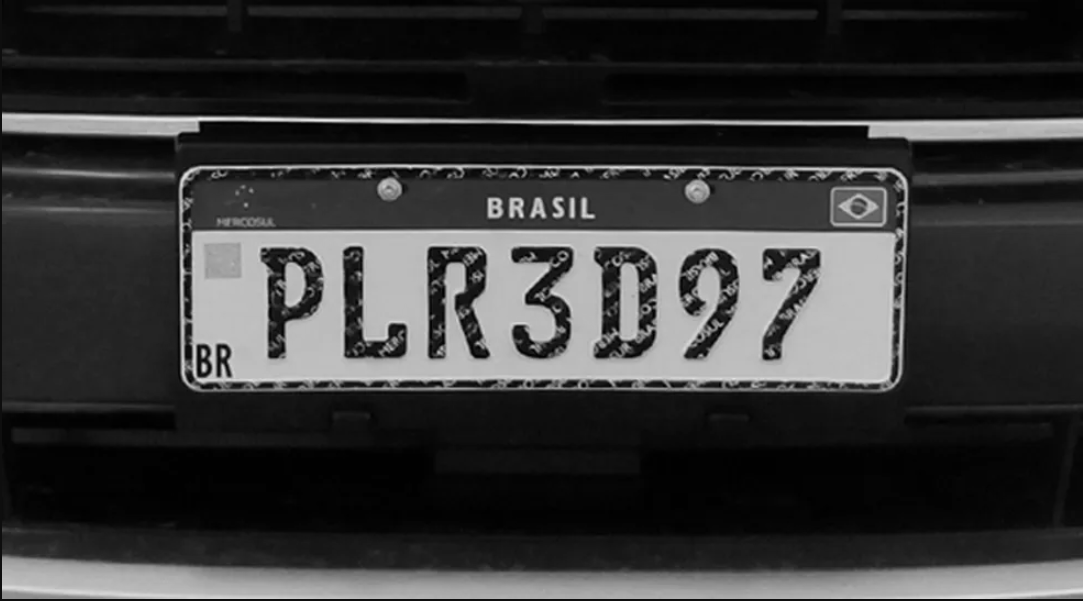

In [49]:
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

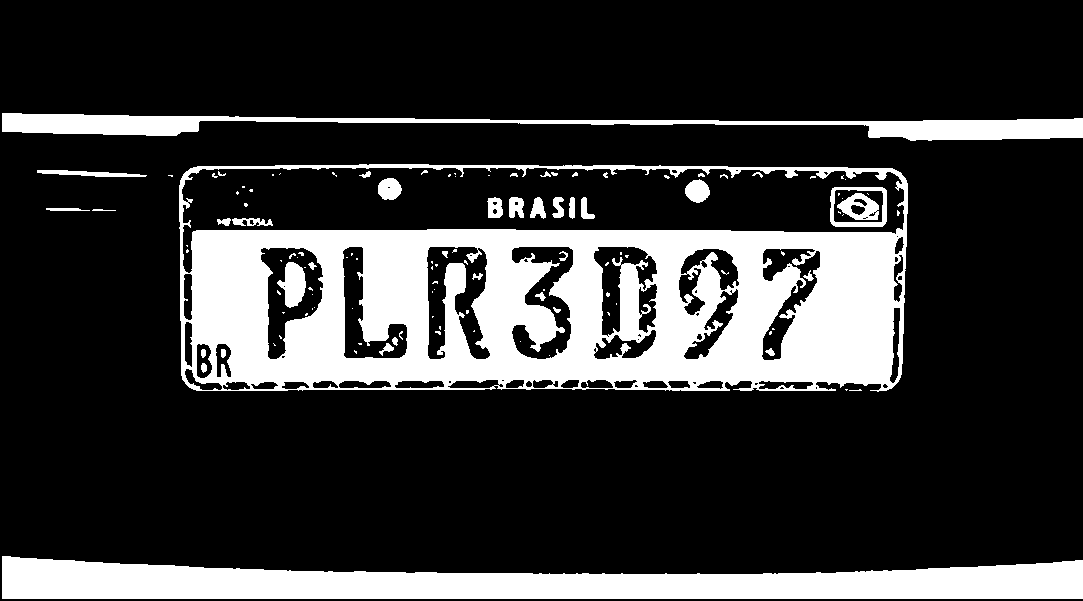

In [50]:
test, bin = cv2.threshold(cinza, 100, 255, cv2.THRESH_BINARY)
cv2_imshow(bin)

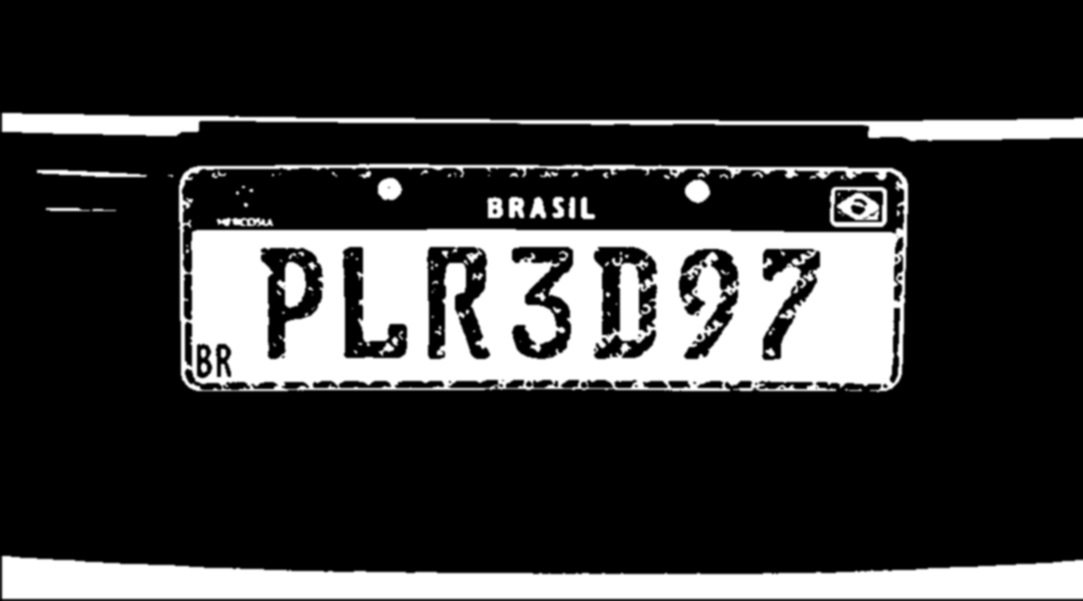

In [51]:

desfoque = cv2.GaussianBlur(bin, (5, 5), 0)
cv2_imshow(desfoque)

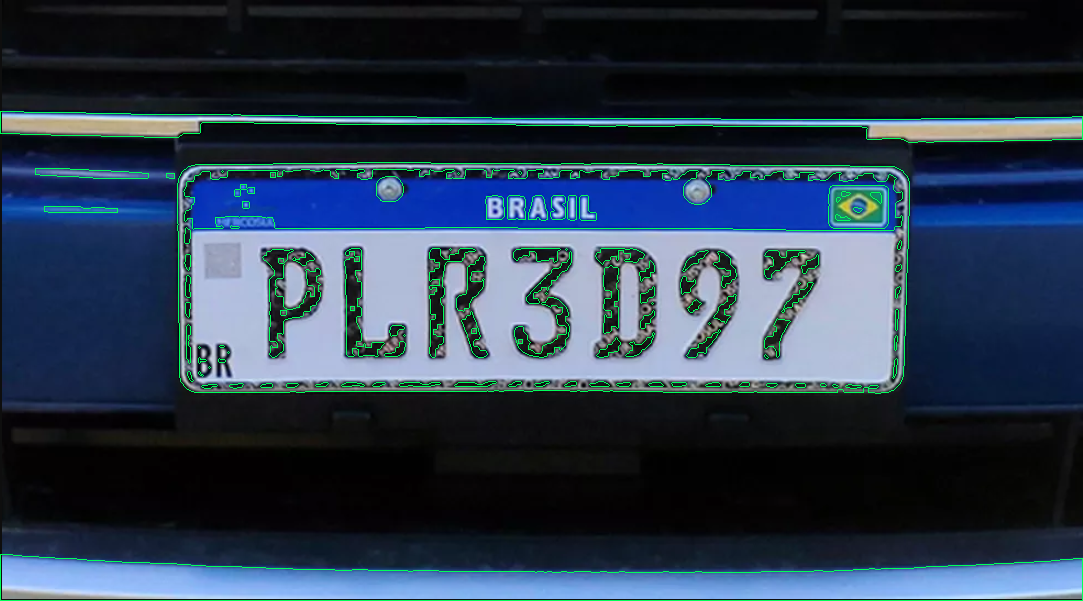

In [52]:
contornos, hierarquia = cv2.findContours(desfoque, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contornos, -1, (90, 255, 0), 1)
cv2_imshow(img)

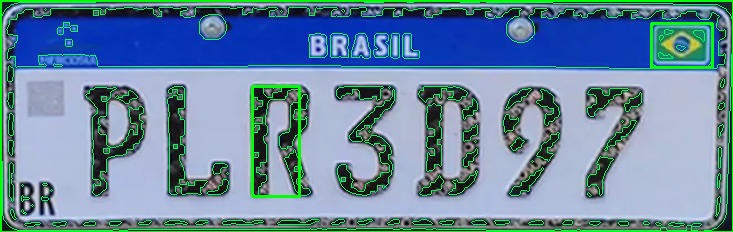

In [64]:
for c in contornos:
    perimetro = cv2.arcLength(c, True)
    if perimetro > 500:
        aprox = cv2.approxPolyDP(c, 0.03 * perimetro, True)
        if len(aprox) == 4:
            (x, y, alt, lar) = cv2.boundingRect(c)
            cv2.rectangle(img, (x, y), (x + alt, y + lar), (0, 255, 0), 2)
            roi = img[y:y + lar, x:x + alt]
cv2_imshow( roi)

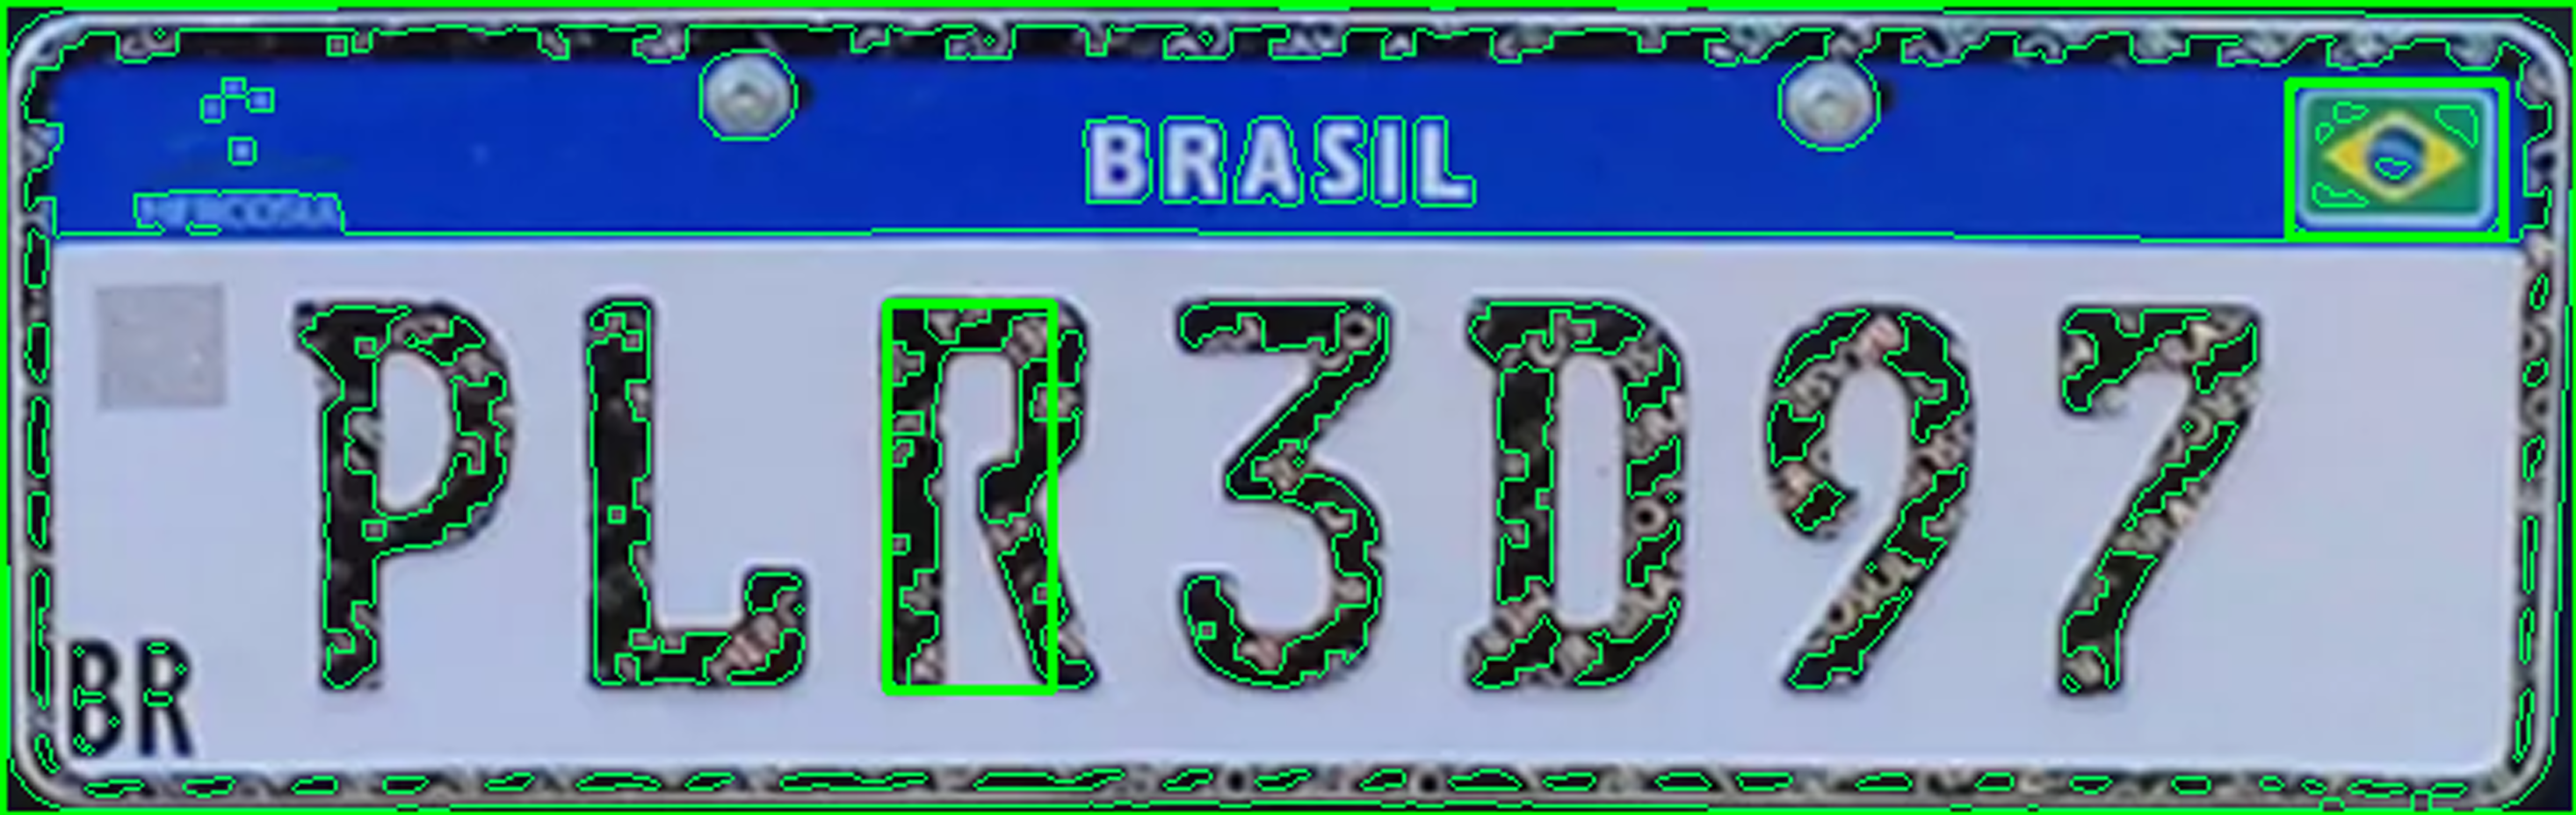

In [65]:
resize_img_roi = cv2.resize(roi, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
cv2_imshow(resize_img_roi)

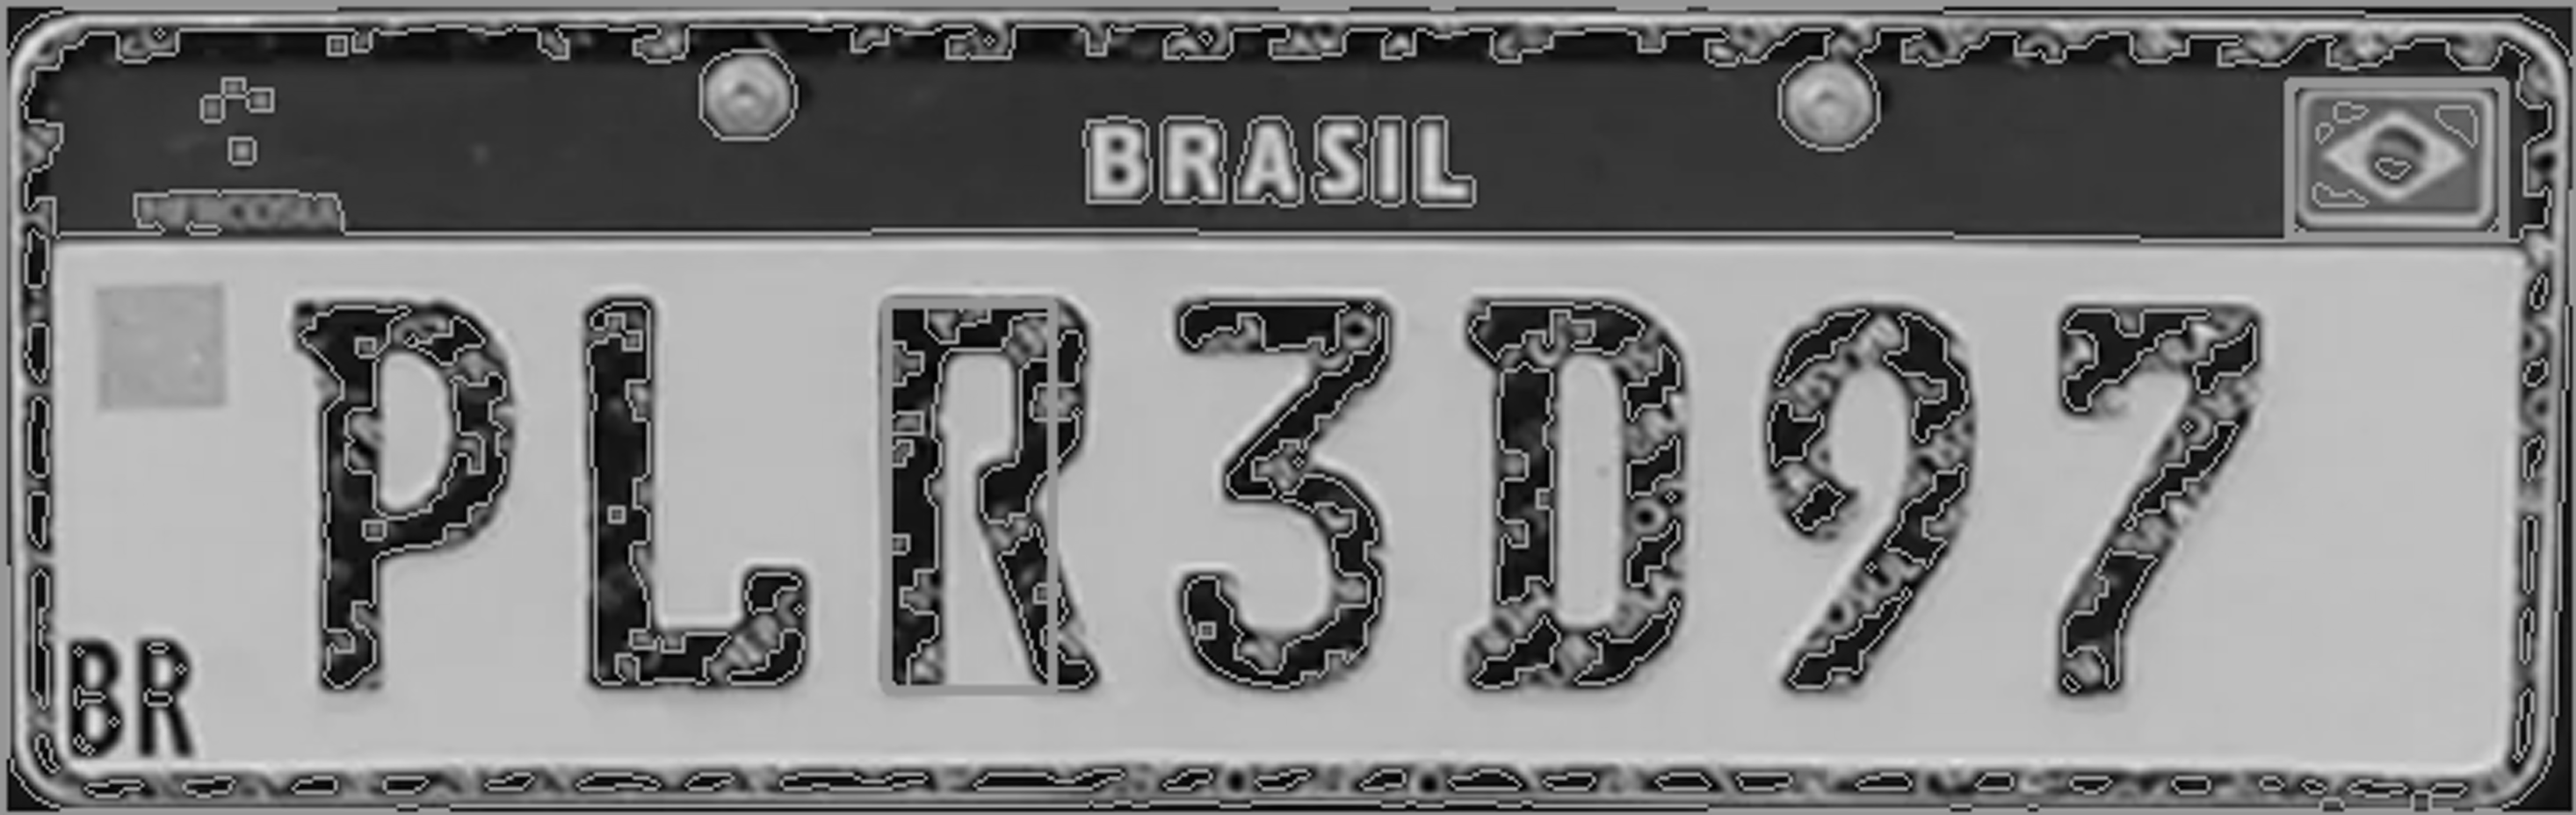

In [66]:
img_cinza = cv2.cvtColor(resize_img_roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_cinza)

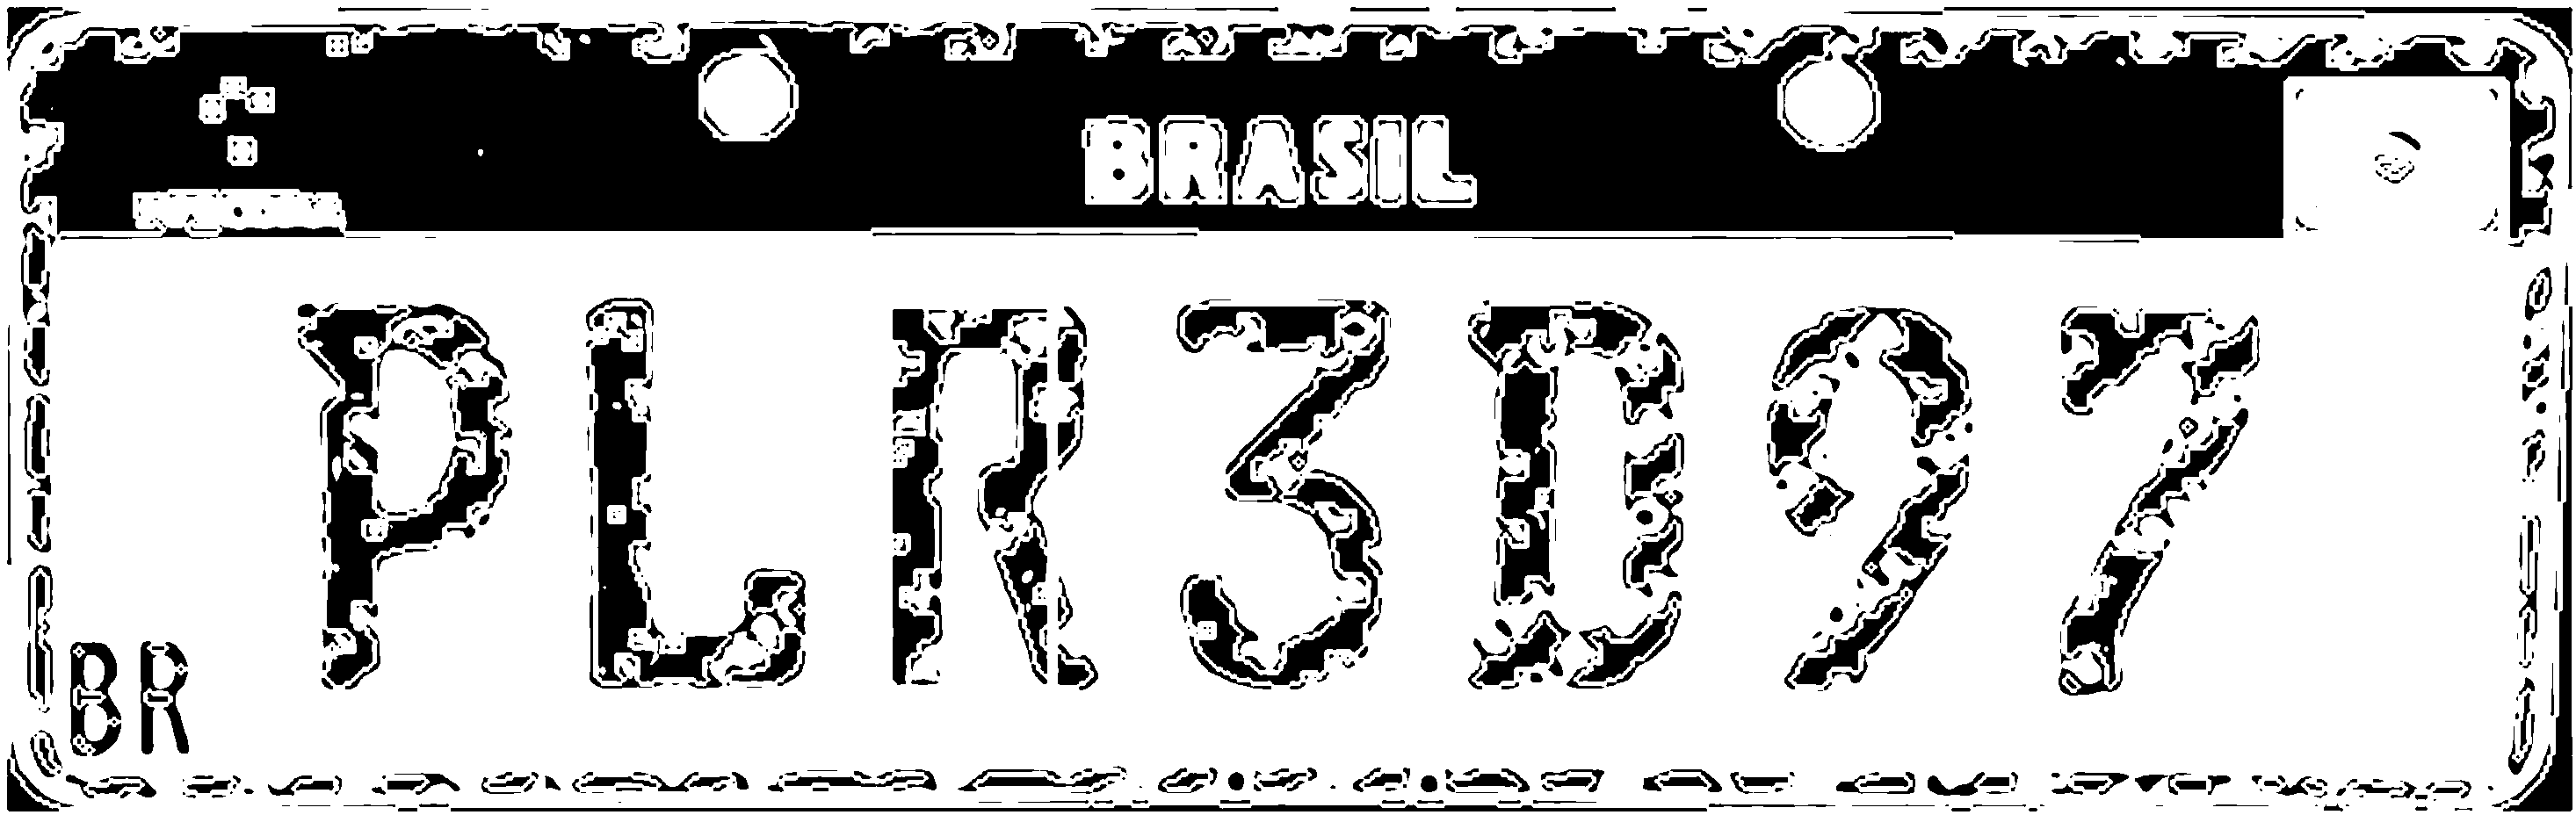

In [67]:
_, img_binary = cv2.threshold(img_cinza, 70, 255, cv2.THRESH_BINARY)
cv2_imshow(img_binary)

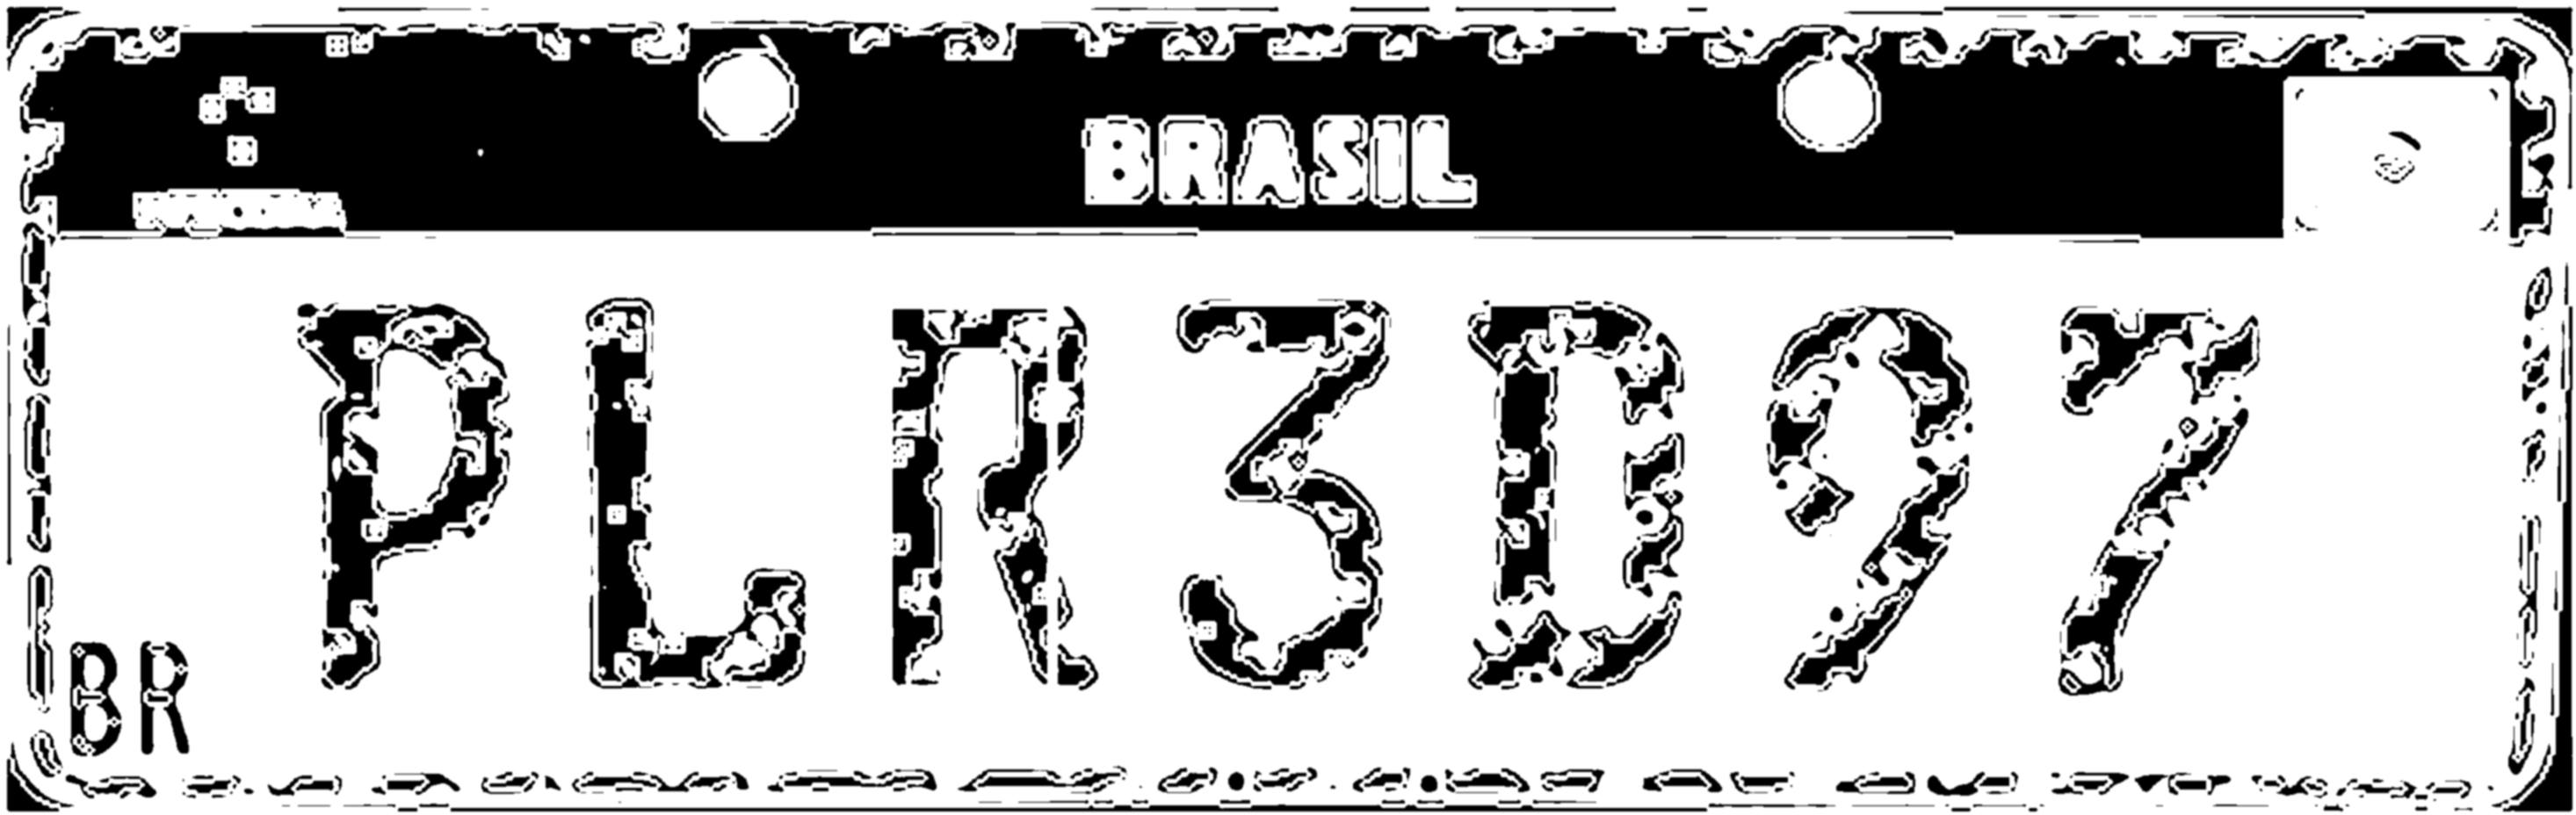

In [68]:
img_desfoque = cv2.GaussianBlur(img_binary, (5, 5), 0)
img_ocr = img_desfoque
cv2_imshow(img_ocr)

In [71]:
config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6'
texto = pytesseract.image_to_string(img_ocr, lang='eng', config=config)
print(texto)

NameError: ignored